In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
import shutil

In [3]:
file_path_normalisasi_extreme = 'D:\Tugas Akhir\Stroke\hasil_setelah_normalisasi.csv'
df_normalisasi_Extreme = pd.read_csv(file_path_normalisasi_extreme)

file_path_normalisasi_mild = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
df_normalisasi_mild = pd.read_csv(file_path_normalisasi_mild)



In [4]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


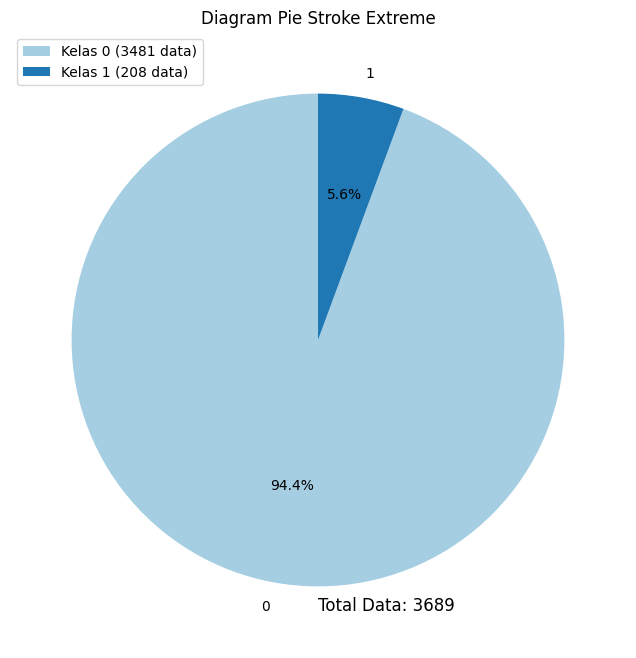

In [5]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_Extreme['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke Extreme')

# Tambahkan keterangan legend
legend_labels = [f'Kelas {label} ({count} data)' for label, count in zip(stroke_counts.index, stroke_counts)]
plt.legend(legend_labels, loc='upper left')

# Tambahkan keterangan total data
total_data = len(df_normalisasi_Extreme['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='left')

# Tampilkan diagram
plt.show()


In [6]:
df_normalisasi_mild

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,"0,7368",0,1,1,0,1,0,0,"0,8012","0,5227",0,1,0,0,1
1,0,"0,9649",0,1,1,0,1,0,1,"0,2342","0,438",0,0,1,0,1
2,1,"0,4211",0,0,1,0,1,0,0,"0,5358","0,4773",0,0,0,1,1
3,1,"0,9474",1,0,1,0,0,1,1,"0,5491","0,2624",0,0,1,0,1
4,0,"0,9825",0,0,1,0,1,0,0,"0,605","0,3657",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,"0,8804",0,0,1,0,1,0,1,"0,6311","0,3073",1,0,0,0,1
5767,0,"0,8583",0,0,1,0,1,0,1,"0,1403","0,2548",1,0,0,0,1
5768,1,"0,9298",0,0,1,0,1,0,0,"0,0904","0,1904",1,0,0,0,1
5769,1,"0,9009",0,0,1,0,1,0,1,"0,2097","0,2386",1,0,0,0,1


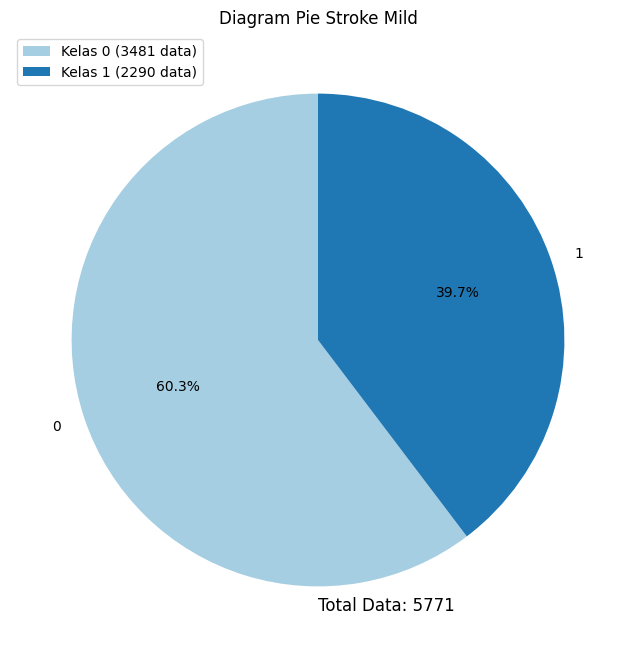

In [7]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_mild['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke Mild')

# Tambahkan keterangan legend
legend_labels = [f'Kelas {label} ({count} data)' for label, count in zip(stroke_counts.index, stroke_counts)]
plt.legend(legend_labels, loc='upper left')

# Tambahkan keterangan total data
total_data = len(df_normalisasi_mild['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='left')

# Tampilkan diagram
plt.show()


In [8]:
# Menentukan jumlah baris yang akan dihapus secara acak (178 data dengan stroke = 1)
jumlah_hapus = 178

# Mengambil indeks baris dengan stroke = 1
indeks_stroke_1 = df_normalisasi_Extreme[df_normalisasi_Extreme['stroke'] == 1].index

# Memastikan jumlah data yang akan dihapus tidak melebihi jumlah data dengan stroke = 1
jumlah_hapus = min(jumlah_hapus, len(indeks_stroke_1))

# Menghapus baris dengan indeks yang telah dipilih
indeks_hapus = np.random.choice(indeks_stroke_1, size=jumlah_hapus, replace=False)
df_normalisasi_Extreme = df_normalisasi_Extreme.drop(index=indeks_hapus)

# Mengurutkan ulang indeks setelah penghapusan
df_normalisasi_Extreme = df_normalisasi_Extreme.reset_index(drop=True)

# Menampilkan informasi setelah penghapusan dan pengurutan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus dan diurutkan: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas = df_normalisasi_Extreme['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke):", jumlah_kelas[0])
print("Jumlah Kelas 1 (Dengan Stroke):", jumlah_kelas[1])

# Menyimpan DataFrame ke file CSV
output_csv_path = 'D:/Tugas Akhir/Stroke/hasil_setelah_penghapusan.csv'
df_normalisasi_Extreme.to_csv(output_csv_path, index=False)

# Copy file CSV ke direktori tujuan (misalnya, 'D:/Tugas Akhir/Stroke/')
output_final_path = 'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'
shutil.copy(output_csv_path, output_final_path)

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus dan diurutkan: 3511
Jumlah Kelas 0 (Tanpa Stroke): 3481
Jumlah Kelas 1 (Dengan Stroke): 30


'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'

In [9]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
1,0,0.8596,1,1,1,0,1,0,1,0.0687,0.3326,0,0,1,0,1
2,0,0.2982,0,0,1,0,1,0,1,0.1302,0.2913,1,0,0,0,1
3,1,1.0000,1,0,1,0,0,1,0,0.6544,0.2252,0,0,1,0,1
4,0,0.9298,0,0,1,0,1,0,1,0.1053,0.2603,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3507,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3508,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3509,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [10]:
# Menampilkan informasi setelah penghapusan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas_extreme = df_normalisasi_Extreme['stroke'].value_counts()
jumlah_kelas_Mild = df_normalisasi_mild['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme):", jumlah_kelas_extreme[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme):", jumlah_kelas_extreme[1])
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild):", jumlah_kelas_Mild[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Mild):", jumlah_kelas_Mild[1])

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus: 3511
Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme): 30
Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Mild): 2290


<Axes: >

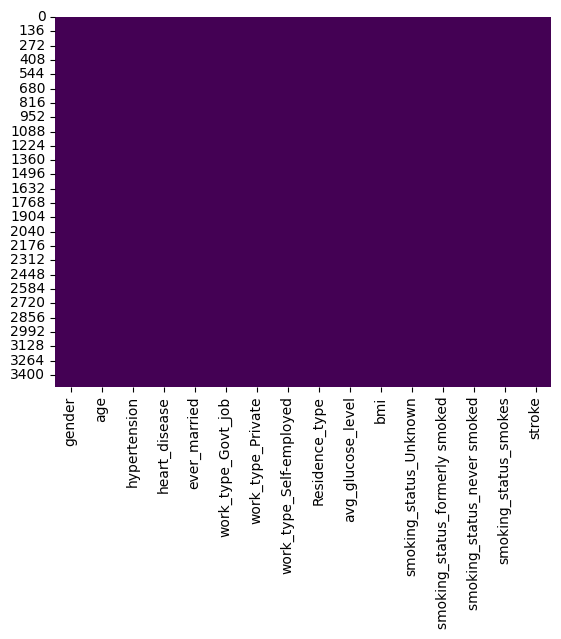

In [11]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df_normalisasi_Extreme.isnull(), cbar=False, cmap='viridis')

<Axes: >

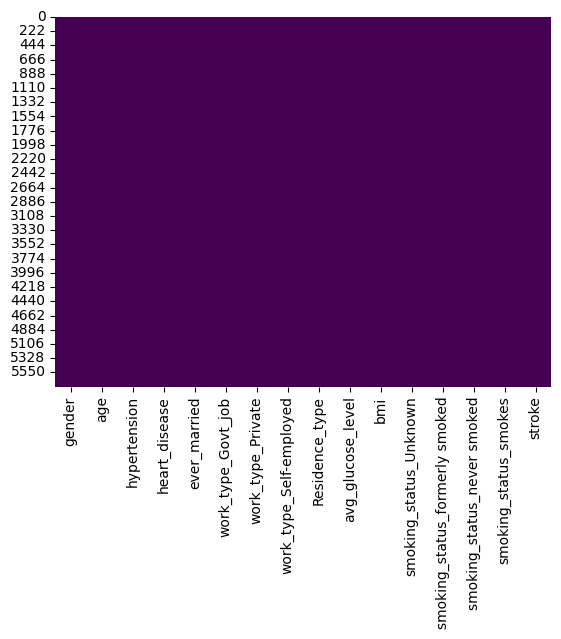

In [12]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df_normalisasi_mild.isnull(), cbar=False, cmap='viridis')

In [13]:
df_Extreme = df_normalisasi_Extreme
df_Mild = df_normalisasi_mild

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df_Extreme['age'] = df_Extreme['age'].astype(str).str.replace(',', '.')
df_Extreme['avg_glucose_level'] = df_Extreme['avg_glucose_level'].astype(str).str.replace(',', '.')
df_Extreme['bmi'] = df_Extreme['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df_Extreme[['age', 'avg_glucose_level', 'bmi']] = df_Extreme[['age', 'avg_glucose_level', 'bmi']].astype(float)

x_extreme = df_Extreme.drop('stroke', axis=1)
y_extreme = df_Extreme['stroke']

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df_Mild['age'] = df_Mild['age'].astype(str).str.replace(',', '.')
df_Mild['avg_glucose_level'] = df_Mild['avg_glucose_level'].astype(str).str.replace(',', '.')
df_Mild['bmi'] = df_Mild['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df_Mild[['age', 'avg_glucose_level', 'bmi']] = df_Mild[['age', 'avg_glucose_level', 'bmi']].astype(float)

x_mild = df_Mild.drop('stroke', axis=1)
y_mild = df_Mild['stroke']

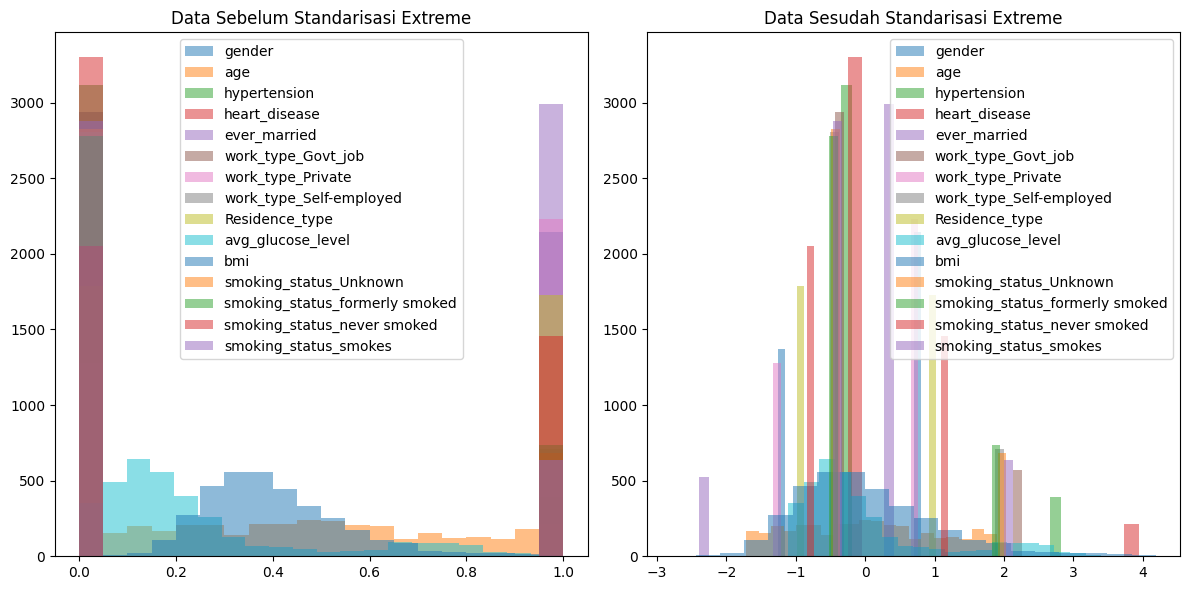

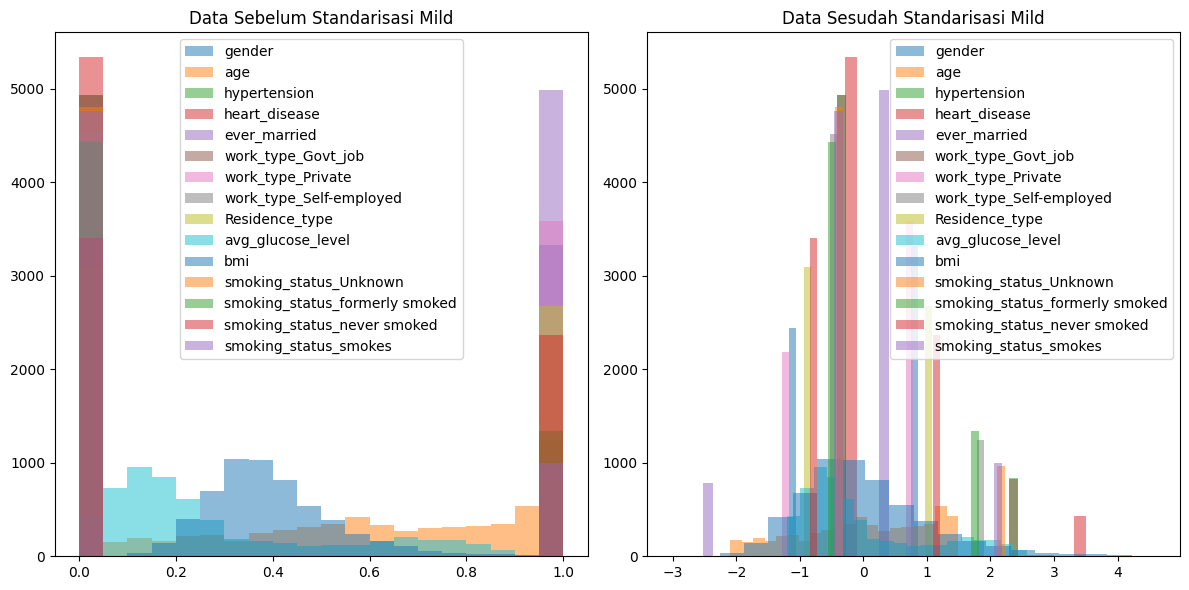

In [14]:
# Drop label target (misalnya, 'stroke') dari DataFrame
df_features_extreme = df_normalisasi_Extreme.drop('stroke', axis=1)
df_features_mild = df_normalisasi_mild.drop('stroke', axis=1)

# Standarisasi data untuk kedua dataset
scaler_extreme = StandardScaler()
df_scaled_extreme = pd.DataFrame(scaler_extreme.fit_transform(df_features_extreme), columns=df_features_extreme.columns)

scaler_mild = StandardScaler()
df_scaled_mild = pd.DataFrame(scaler_mild.fit_transform(df_features_mild), columns=df_features_mild.columns)

# Plot perbandingan data sebelum dan sesudah standarisasi untuk Extreme
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi untuk Extreme
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi Extreme")
for column in df_features_extreme.columns:
    plt.hist(df_features_extreme[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi untuk Extreme
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi Extreme")
for column in df_scaled_extreme.columns:
    plt.hist(df_scaled_extreme[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

# Plot perbandingan data sebelum dan sesudah standarisasi untuk Mild
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi untuk Mild
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi Mild")
for column in df_features_mild.columns:
    plt.hist(df_features_mild[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi untuk Mild
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi Mild")
for column in df_scaled_mild.columns:
    plt.hist(df_scaled_mild[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Tampilkan matriks kovarians
cov_matrix_extreme = np.cov(df_scaled_extreme, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix_extreme)

# Tampilkan matriks kovarians
cov_matrix_mild = np.cov(df_scaled_mild, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix_mild)

Matriks Kovarians:
[[ 1.00028490e+00 -5.38811593e-02 -4.66521238e-02 -1.03826763e-01
  -2.65325859e-02 -2.49322803e-03 -9.35184193e-03  1.35269903e-02
  -2.33985986e-03 -6.36300638e-02 -2.66859584e-02 -3.38702155e-03
  -6.80716279e-02  8.35711414e-02 -3.15742072e-02]
 [-5.38811593e-02  1.00028490e+00  2.25922998e-01  2.55292281e-01
   2.69406512e-01 -8.75240485e-03 -2.20938394e-01  2.73337730e-01
  -8.50405788e-03  1.95312700e-01 -4.00365459e-02 -2.42277771e-02
   1.53414716e-01 -2.90356489e-02 -1.00117049e-01]
 [-4.66521238e-02  2.25922998e-01  1.00028490e+00  1.03798378e-01
   6.15051282e-02 -9.73040117e-03 -5.48928989e-02  7.48782302e-02
   5.31364029e-04  1.60917950e-01  1.03606204e-01 -8.30676877e-02
   2.87683218e-02  4.62913697e-02 -4.19910469e-03]
 [-1.03826763e-01  2.55292281e-01  1.03798378e-01  1.00028490e+00
   2.50964620e-02 -1.81208538e-02 -4.16863924e-02  6.67580015e-02
   1.14392673e-02  1.27208797e-01 -1.04097399e-02 -2.80890245e-02
   5.18006466e-02 -3.16433015e-02  1


Varian Setiap Variabel Extreme:
[1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849]

Varian Setiap Variabel Mild:
[1.00017331 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331
 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331
 1.00017331 1.00017331 1.00017331]

Kovarians Antar Variabel:
[[ 0.00000000e+00 -5.38811593e-02 -4.66521238e-02 -1.03826763e-01
  -2.65325859e-02 -2.49322803e-03 -9.35184193e-03  1.35269903e-02
  -2.33985986e-03 -6.36300638e-02 -2.66859584e-02 -3.38702155e-03
  -6.80716279e-02  8.35711414e-02 -3.15742072e-02]
 [-5.38811593e-02  0.00000000e+00  2.25922998e-01  2.55292281e-01
   2.69406512e-01 -8.75240485e-03 -2.20938394e-01  2.73337730e-01
  -8.50405788e-03  1.95312700e-01 -4.00365459e-02 -2.42277771e-02
   1.53414716e-01 -2.90356489e-02 -1.00117049e-01]
 [-4.66521238e-02  2.25922998e-01  0.00000000e+00  1.03798378e-01
   6.15051282e-02 -9.73

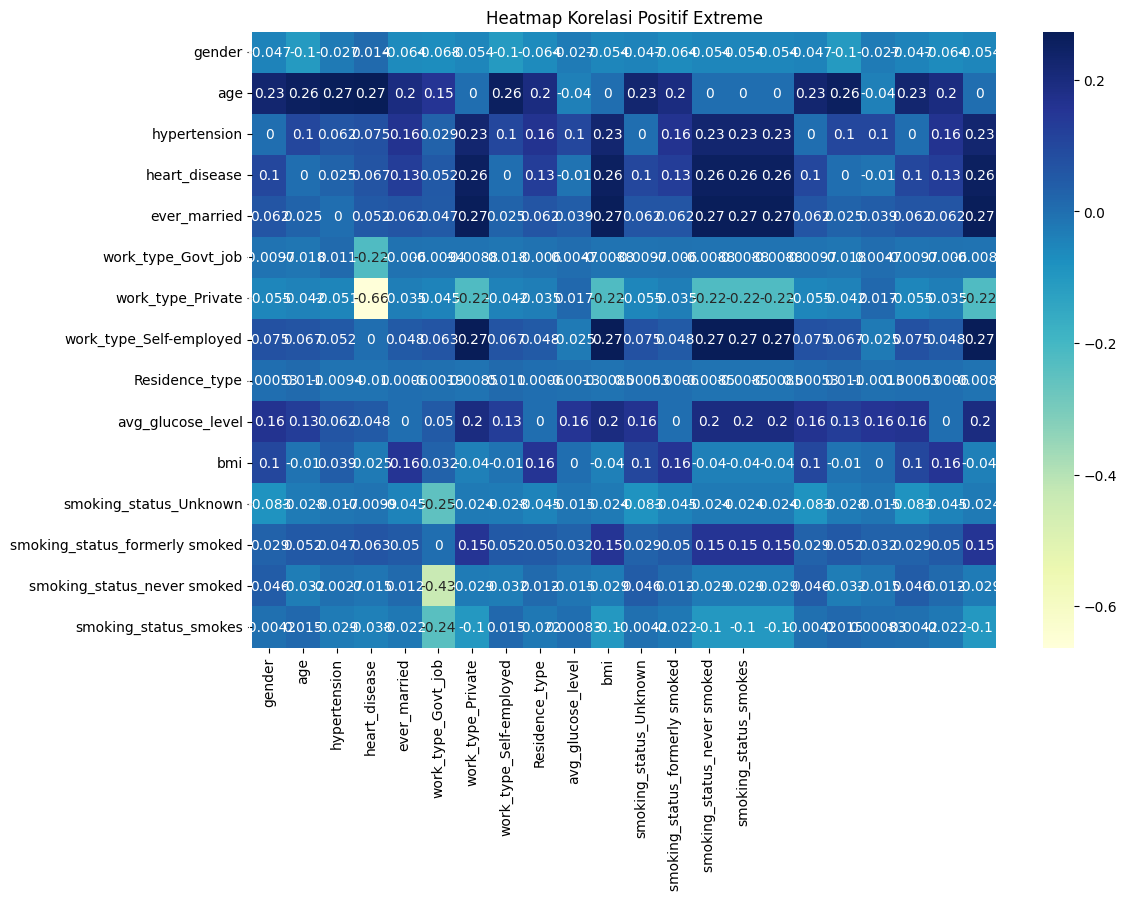

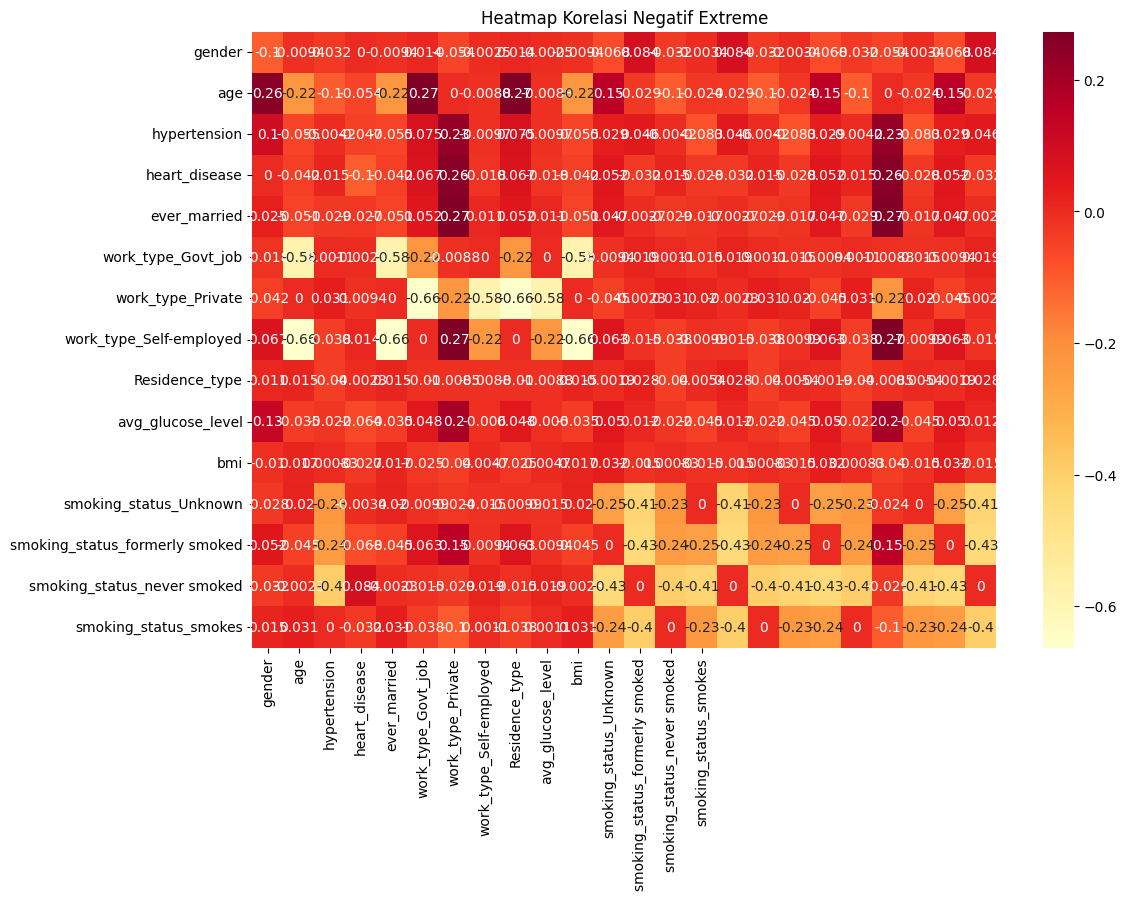

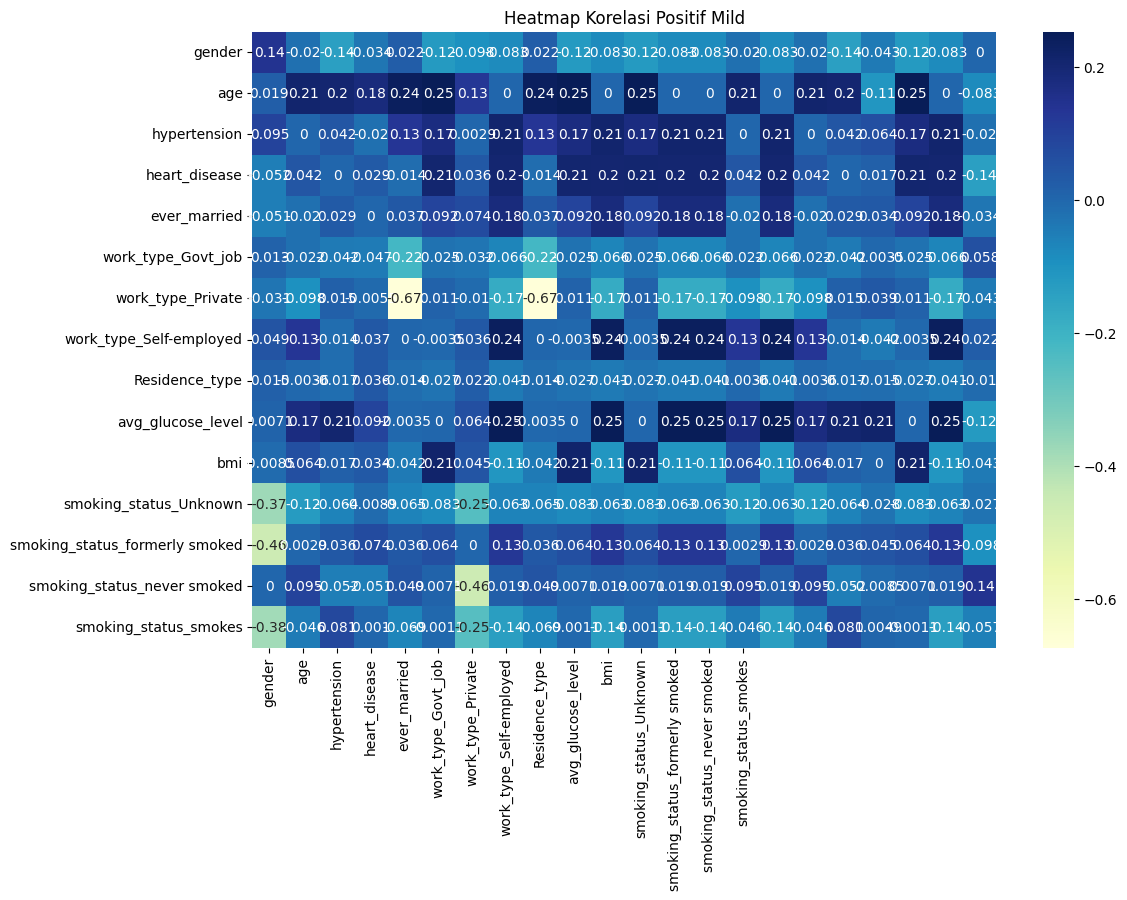

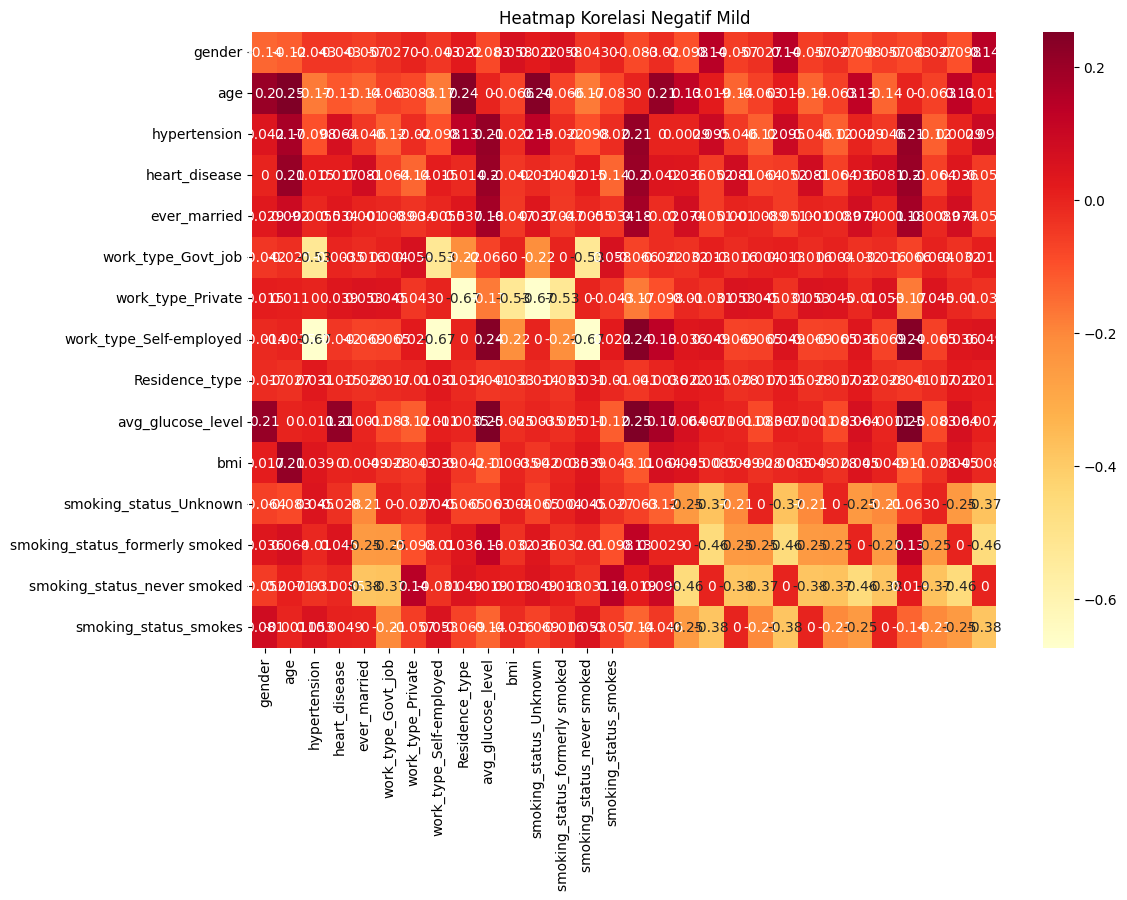

In [16]:
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
threshold = 0.1
# Tampilkan elemen diagonal utama (varian)
variances_extreme = np.diag(cov_matrix_extreme)
print("\nVarian Setiap Variabel Extreme:")
print(variances_extreme)

# Tampilkan elemen diagonal utama (varian)
variances_mild = np.diag(cov_matrix_mild)
print("\nVarian Setiap Variabel Mild:")
print(variances_mild)

# Tampilkan elemen non-diagonal (kovarians)
covariances_extreme = cov_matrix_extreme - np.diag(variances_extreme)
print("\nKovarians Antar Variabel:")
print(covariances_extreme)

# Tampilkan elemen non-diagonal (kovarians)
covariances_mild = cov_matrix_mild - np.diag(variances_mild)
print("\nKovarians Antar Variabel:")
print(covariances_mild)

# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices_extreme = np.where(covariances_extreme > threshold)
negative_correlation_indices_extreme = np.where(covariances_extreme < -threshold)
# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices_mild = np.where(covariances_mild > threshold)
negative_correlation_indices_mild = np.where(covariances_mild < -threshold)

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif Extreme:")
for i, j in zip(positive_correlation_indices_extreme[0], positive_correlation_indices_extreme[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif Extreme:")
for i, j in zip(negative_correlation_indices_extreme[0], negative_correlation_indices_extreme[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif Mild:")
for i, j in zip(positive_correlation_indices_mild[0], positive_correlation_indices_mild[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif Mild:")
for i, j in zip(negative_correlation_indices_mild[0], negative_correlation_indices_mild[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif Extreme")
sns.heatmap(covariances_extreme[:, positive_correlation_indices_extreme[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif Extreme")
sns.heatmap(covariances_extreme[:, negative_correlation_indices_extreme[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif Mild")
sns.heatmap(covariances_mild[:, positive_correlation_indices_mild[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif Mild")
sns.heatmap(covariances_mild[:, negative_correlation_indices_mild[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

In [17]:
from sklearn.decomposition import PCA

# Hitung eigenvalues dan eigenvectors untuk data Extreme
pca_extreme = PCA()
pca_extreme.fit(df_scaled_extreme)
eigenvalues_extreme = pca_extreme.explained_variance_
eigenvectors_extreme = pca_extreme.components_

# Tampilkan eigenvalues beserta nama kolom untuk data Extreme
print("\nEigenvalues Extreme:")
for col, value in zip(df_normalisasi_Extreme.columns, eigenvalues_extreme):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom untuk data Extreme
print("\nEigenvectors Extreme:")
for i, vector in enumerate(eigenvectors_extreme):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df_normalisasi_Extreme.columns, vector):
        print(f"   {col}: {round(value, 4)}")

# Hitung eigenvalues dan eigenvectors untuk data Mild
pca_mild = PCA()
pca_mild.fit(df_scaled_mild)
eigenvalues_mild = pca_mild.explained_variance_
eigenvectors_mild = pca_mild.components_

# Tampilkan eigenvalues beserta nama kolom untuk data Mild
print("\nEigenvalues Mild:")
for col, value in zip(df_normalisasi_mild.columns, eigenvalues_mild):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom untuk data Mild
print("\nEigenvectors Mild:")
for i, vector in enumerate(eigenvectors_mild):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df_normalisasi_mild.columns, vector):
        print(f"   {col}: {round(value, 4)}")





Eigenvalues Extreme:
gender: 2.0836
age: 1.5804
hypertension: 1.5171
heart_disease: 1.2821
ever_married: 1.1958
work_type_Govt_job: 1.178
work_type_Private: 1.0611
work_type_Self-employed: 1.0214
Residence_type: 0.9775
avg_glucose_level: 0.9174
bmi: 0.8472
smoking_status_Unknown: 0.7897
smoking_status_formerly smoked: 0.5528
smoking_status_never smoked: 0.0
smoking_status_smokes: 0.0

Eigenvectors Extreme:
Principal Component 1:
   gender: -0.0762
   age: 0.4605
   hypertension: 0.236
   heart_disease: 0.2259
   ever_married: 0.2105
   work_type_Govt_job: 0.1773
   work_type_Private: -0.5238
   work_type_Self-employed: 0.4655
   Residence_type: -0.0139
   avg_glucose_level: 0.2173
   bmi: 0.0339
   smoking_status_Unknown: -0.0784
   smoking_status_formerly smoked: 0.2084
   smoking_status_never smoked: -0.0342
   smoking_status_smokes: -0.0959
Principal Component 2:
   gender: -0.2368
   age: 0.1781
   hypertension: 0.1272
   heart_disease: 0.2205
   ever_married: 0.1158
   work_type_

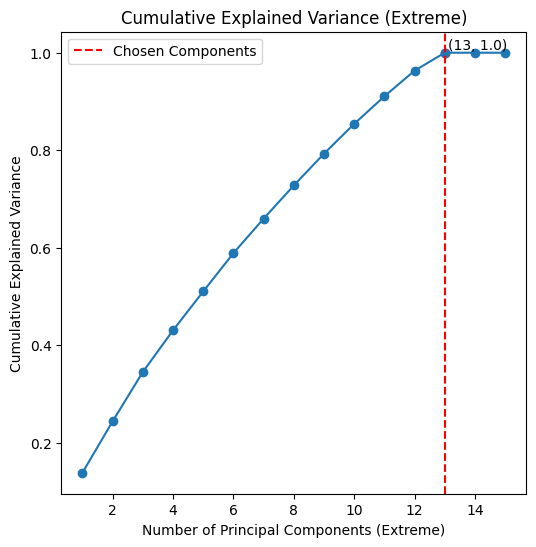

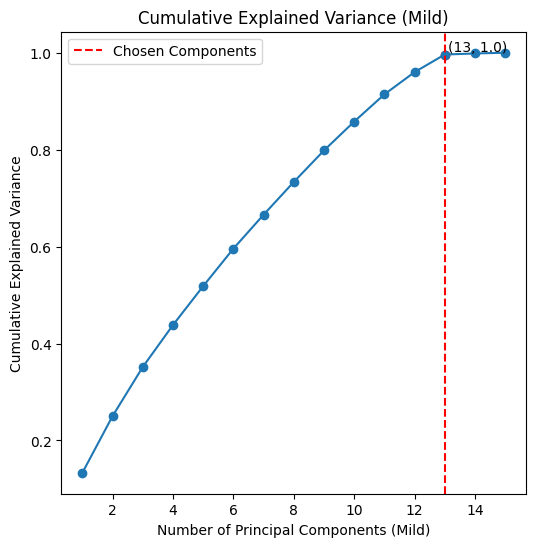

In [18]:
# Plotting cumulative explained variance untuk data Extreme
num_components_extreme = len(pca_extreme.explained_variance_ratio_)
plt.figure(figsize=(6, 6))

plt.plot(range(1, num_components_extreme + 1), np.cumsum(pca_extreme.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components (Extreme)')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
chosen_components_extreme = 13
plt.axvline(x=chosen_components_extreme, color='r', linestyle='--', label='Chosen Components')
plt.scatter(chosen_components_extreme, np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], color='r')
plt.text(chosen_components_extreme + 0.1, np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], f'({chosen_components_extreme}, {np.round(np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], 2)})', verticalalignment='bottom')

plt.legend()
plt.title('Cumulative Explained Variance (Extreme)')
plt.show()

# Plotting cumulative explained variance untuk data Mild
num_components_mild = len(pca_mild.explained_variance_ratio_)
plt.figure(figsize=(6, 6))

plt.plot(range(1, num_components_mild + 1), np.cumsum(pca_mild.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components (Mild)')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
chosen_components_mild = 13
plt.axvline(x=chosen_components_mild, color='r', linestyle='--', label='Chosen Components')
plt.scatter(chosen_components_mild, np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], color='r')
plt.text(chosen_components_mild + 0.1, np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], f'({chosen_components_mild}, {np.round(np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], 2)})', verticalalignment='bottom')

plt.legend()
plt.title('Cumulative Explained Variance (Mild)')
plt.show()


In [19]:
# Lakukan PCA untuk data Extreme
n_components_extreme = 13  # Ganti dengan jumlah komponen utama yang diinginkan untuk Extreme
pca_extreme = PCA(n_components=n_components_extreme)
X_pca_extreme = pca_extreme.fit_transform(df_scaled_extreme)

# Lakukan PCA untuk data Mild
n_components_mild = 13  # Ganti dengan jumlah komponen utama yang diinginkan untuk Mild
pca_mild = PCA(n_components=n_components_mild)
X_pca_mild = pca_mild.fit_transform(df_scaled_mild)

In [20]:
# Tampilkan explained variance ratio untuk Extreme
print("Explained Variance Ratio (Extreme):")
print(pca_extreme.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif) untuk Extreme
cumulative_explained_variance_ratio_extreme = np.cumsum(pca_extreme.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio (Extreme):")
print(cumulative_explained_variance_ratio_extreme)

# Tampilkan komponen utama untuk Extreme
print("\nPrincipal Components (Extreme):")
print(pca_extreme.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama untuk Extreme
for i, ratio in enumerate(pca_extreme.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df_normalisasi_Extreme.columns[i]}) - Proporsi Varians: {ratio:.4f}")

# Tampilkan explained variance ratio untuk Mild
print("\nExplained Variance Ratio (Mild):")
print(pca_mild.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif) untuk Mild
cumulative_explained_variance_ratio_mild = np.cumsum(pca_mild.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio (Mild):")
print(cumulative_explained_variance_ratio_mild)

# Tampilkan komponen utama untuk Mild
print("\nPrincipal Components (Mild):")
print(pca_mild.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama untuk Mild
for i, ratio in enumerate(pca_mild.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df_normalisasi_mild.columns[i]}) - Proporsi Varians: {ratio:.4f}")


Explained Variance Ratio (Extreme):
[0.13886877 0.10533293 0.10110868 0.08545079 0.07969891 0.07851365
 0.07071997 0.0680734  0.06514834 0.06114206 0.05646334 0.0526342
 0.03684494]

Cumulative Explained Variance Ratio (Extreme):
[0.13886877 0.2442017  0.34531039 0.43076117 0.51046009 0.58897374
 0.65969371 0.72776711 0.79291545 0.85405751 0.91052086 0.96315506
 1.        ]

Principal Components (Extreme):
[[-0.07621803  0.46053994  0.23602312  0.22594578  0.21052627  0.17725127
  -0.52382329  0.46549733 -0.01388995  0.21733394  0.03390406 -0.07839208
   0.20840321 -0.0342054  -0.09588404]
 [-0.23678553  0.17808256  0.12719027  0.22047118  0.11582221 -0.38146374
   0.38633679 -0.11213982 -0.01859811  0.19127784  0.12147271  0.12307669
   0.37827048 -0.53862382  0.16319533]
 [-0.00234075  0.16509007  0.28804883  0.14659115  0.13248047 -0.30215605
   0.3290798  -0.11651696  0.06295924  0.26238101  0.13267516 -0.37109129
  -0.09472462  0.57785337 -0.25797916]
 [-0.15734059 -0.13710209  0.

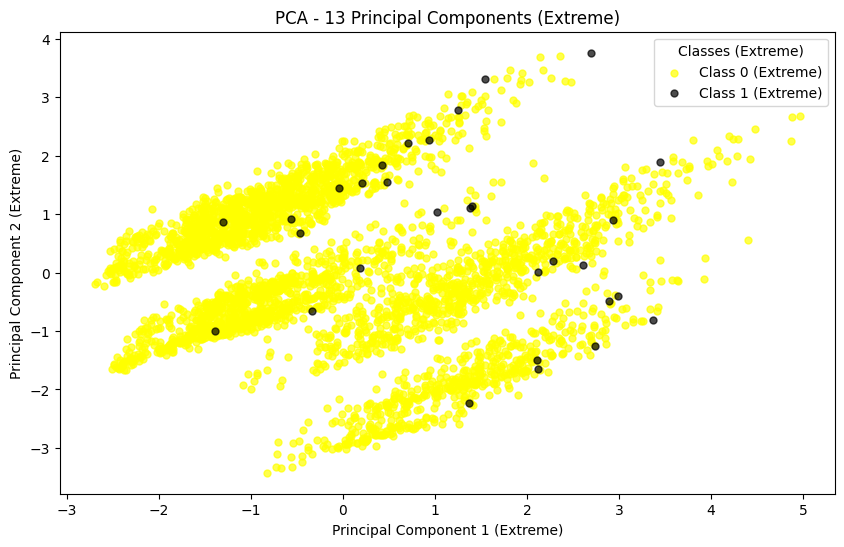

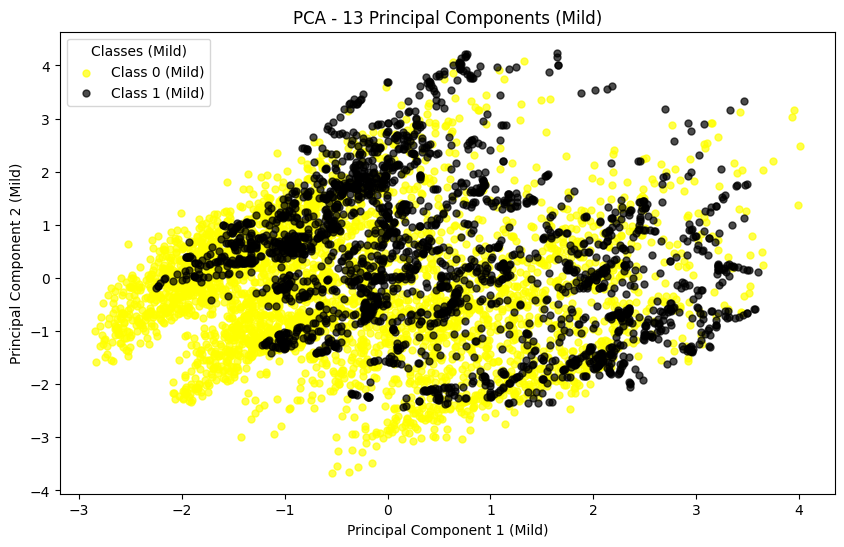

In [21]:
# Buat DataFrame hasil PCA untuk Extreme
df_pca_result_extreme = pd.DataFrame(data=X_pca_extreme, columns=[f"PC{i+1}_Extreme" for i in range(n_components_extreme)])
df_pca_result_extreme['stroke'] = y_extreme  # Tambahkan kolom target ke hasil PCA Extreme

# Simpan hasil PCA Extreme ke file CSV
df_pca_result_extreme.to_csv('data_setelah_pca_extreme.csv', index=False)

# Copy file CSV hasil PCA Extreme ke direktori tujuan
shutil.copy('data_setelah_pca_extreme.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca_extreme.csv')

# Plot hasil PCA untuk Extreme
plt.figure(figsize=(10, 6))

# Pisahkan kelas 0 dan kelas 1 pada Extreme
class_0_extreme = df_pca_result_extreme[df_pca_result_extreme['stroke'] == 0]
class_1_extreme = df_pca_result_extreme[df_pca_result_extreme['stroke'] == 1]

# Plot kelas 0 pada Extreme dengan warna kuning
plt.scatter(class_0_extreme['PC1_Extreme'], class_0_extreme['PC2_Extreme'], c='yellow', marker='o', s=25, alpha=0.7, label='Class 0 (Extreme)')

# Plot kelas 1 pada Extreme dengan warna hitam
plt.scatter(class_1_extreme['PC1_Extreme'], class_1_extreme['PC2_Extreme'], c='black', marker='o', s=25, alpha=0.7, label='Class 1 (Extreme)')

# Tambahkan legenda untuk kelas pada Extreme
plt.legend(title="Classes (Extreme)")

# Tambahkan label dan judul pada Extreme
plt.title('PCA - 13 Principal Components (Extreme)')
plt.xlabel('Principal Component 1 (Extreme)')
plt.ylabel('Principal Component 2 (Extreme)')
plt.show()

# Buat DataFrame hasil PCA untuk Mild
df_pca_result_mild = pd.DataFrame(data=X_pca_mild, columns=[f"PC{i+1}_Mild" for i in range(n_components_mild)])
df_pca_result_mild['stroke'] = y_mild  # Tambahkan kolom target ke hasil PCA Mild

# Simpan hasil PCA Mild ke file CSV
df_pca_result_mild.to_csv('data_setelah_pca_mild.csv', index=False)

# Copy file CSV hasil PCA Mild ke direktori tujuan
shutil.copy('data_setelah_pca_mild.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca_mild.csv')

# Plot hasil PCA untuk Mild
plt.figure(figsize=(10, 6))

# Pisahkan kelas 0 dan kelas 1 pada Mild
class_0_mild = df_pca_result_mild[df_pca_result_mild['stroke'] == 0]
class_1_mild = df_pca_result_mild[df_pca_result_mild['stroke'] == 1]

# Plot kelas 0 pada Mild dengan warna kuning
plt.scatter(class_0_mild['PC1_Mild'], class_0_mild['PC2_Mild'], c='yellow', marker='o', s=25, alpha=0.7, label='Class 0 (Mild)')

# Plot kelas 1 pada Mild dengan warna hitam
plt.scatter(class_1_mild['PC1_Mild'], class_1_mild['PC2_Mild'], c='black', marker='o', s=25, alpha=0.7, label='Class 1 (Mild)')

# Tambahkan legenda untuk kelas pada Mild
plt.legend(title="Classes (Mild)")

# Tambahkan label dan judul pada Mild
plt.title('PCA - 13 Principal Components (Mild)')
plt.xlabel('Principal Component 1 (Mild)')
plt.ylabel('Principal Component 2 (Mild)')
plt.show()


In [22]:
df_pca_result_extreme

,PC1_Extreme,PC2_Extreme,PC3_Extreme,PC4_Extreme,PC5_Extreme,PC6_Extreme,PC7_Extreme,PC8_Extreme,PC9_Extreme,PC10_Extreme,PC11_Extreme,PC12_Extreme,PC13_Extreme,stroke
0,1.018534,1.036371,2.394898,-0.101092,-0.288633,0.851544,-2.827678,1.266649,0.099034,0.028696,-1.576110,1.958072,0.457698,1
1,1.402786,1.137748,2.949630,0.180803,-0.651715,1.026294,-2.993931,1.314436,0.102109,0.716155,1.412588,2.277676,-0.591888,1
2,-1.304338,0.870698,-0.988276,-1.525056,0.297694,1.218709,-0.995753,0.496005,-0.572721,-1.051932,0.501527,-0.294270,-0.458877,1
3,3.368699,-0.804425,1.919759,-0.522629,-1.565849,0.330005,0.604236,-0.753653,0.636484,1.083719,1.549434,-1.740086,-0.237107,1
4,0.422485,1.847132,0.033107,-0.651608,1.093117,-1.642502,-1.488890,0.134047,-0.791524,-0.705025,0.500720,-0.383372,1.138691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.938364,-0.936571,1.172005,-0.920319,-0.242651,-0.676169,-1.125515,-0.262200,-1.121622,0.362666,0.066629,-0.259299,0.245106,0
3507,2.346194,-1.199197,0.935491,-0.694191,-0.970035,-0.044510,1.555696,-0.875954,0.407018,-0.349832,-0.965876,0.464274,1.204571,0
3508,0.737410,-2.090636,0.166105,-0.944012,-0.948272,-0.802885,0.892336,0.626929,-0.960095,-0.607717,-0.407434,0.424116,-1.150933,0
3509,0.051604,1.931366,0.275581,-0.049487,1.393241,-1.121542,-0.566878,0.661385,-0.531799,-0.663026,-0.275524,-1.501180,-0.447329,0


In [23]:
df_pca_result_mild

,PC1_Mild,PC2_Mild,PC3_Mild,PC4_Mild,PC5_Mild,PC6_Mild,PC7_Mild,PC8_Mild,PC9_Mild,PC10_Mild,PC11_Mild,PC12_Mild,PC13_Mild,stroke
0,0.692583,4.070785,0.341690,0.781236,1.025035,0.627786,-0.860729,0.935599,-0.213074,-1.431982,1.547270,0.560242,0.776168,1
1,0.442122,1.670641,1.827641,0.255005,-0.534702,0.867016,-2.053191,-0.634286,1.198394,-1.521385,1.150836,1.602076,-0.835692,1
2,-1.331145,0.854510,0.039186,1.732012,-0.839118,-0.461259,0.826414,-0.204432,-1.595500,0.540747,0.372651,-0.827407,0.176897,1
3,3.319632,-0.744979,1.398013,-0.613190,-1.003275,0.004069,0.259087,-0.659510,0.659191,1.761697,-0.122173,-0.380294,0.673034,1
4,0.416665,2.518512,-0.226657,-0.775090,0.869267,-0.148637,-0.590274,0.887080,-0.767889,-0.302738,-0.791681,-1.227713,-0.277239,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,-0.671230,0.745156,-0.248357,-1.304432,-0.225578,2.057133,-0.258829,-1.028321,0.093189,1.410109,0.940320,-1.474794,-0.033865,1
5767,-1.091993,0.587083,-0.945311,-1.723951,-0.804647,1.797878,-0.815555,-0.740829,1.026149,0.338245,-0.746141,-0.198623,-0.641214,1
5768,-1.001804,-0.204983,-0.928593,-1.795468,-1.057251,1.879419,-0.961362,0.604614,-1.104512,1.133638,0.110557,-0.087520,-0.573755,1
5769,-1.015178,0.024810,-0.696652,-1.881990,-0.730162,1.602167,-0.797571,-0.807514,0.175574,1.405021,0.605075,-0.464734,-0.588045,1


In [24]:
# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca_extreme = df_pca_result_extreme['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca_extreme[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca_extreme[1]}')

# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca_mild = df_pca_result_mild['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca_mild[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca_mild[1]}')

Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 30
Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 2290


Jumlah kluster optimal (elbow) - Extreme: 5
Jumlah kluster optimal (elbow) - Mild: 6


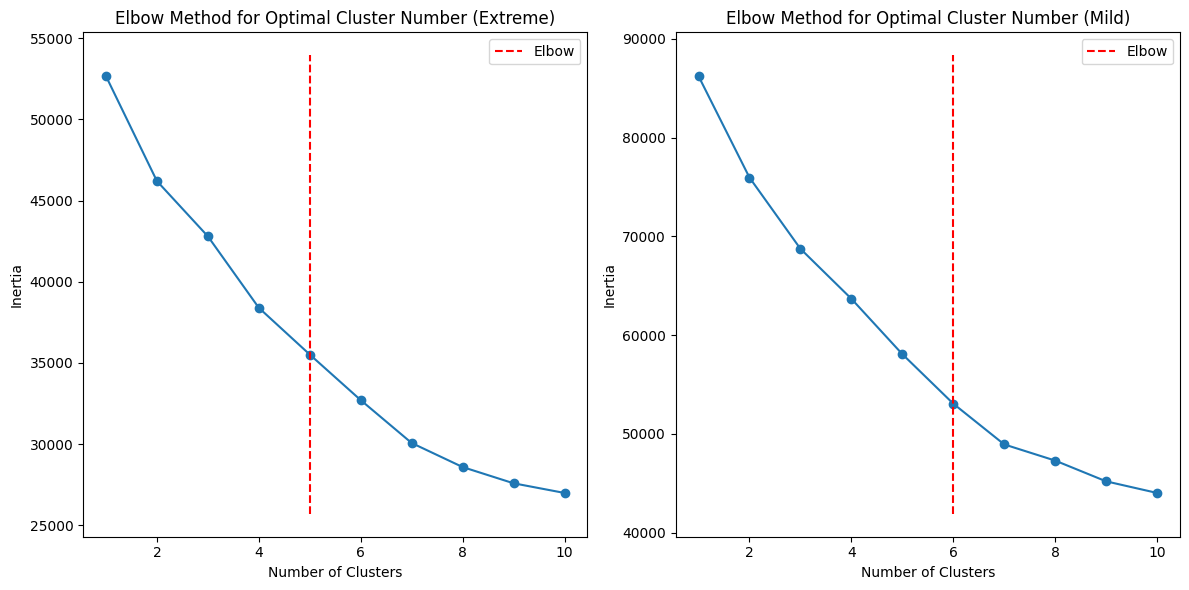

In [25]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Range jumlah cluster yang akan diuji
range_clusters = range(1, 11)  # Misalnya, uji dari 1 hingga 10 clusters

# Simpan inersia untuk setiap jumlah cluster untuk Extreme
inertia_extreme = []

for n_clusters in range_clusters:
    kmeans_extreme = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_extreme.fit(X_pca_extreme)
    inertia_extreme.append(kmeans_extreme.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis untuk Extreme
kl_extreme = KneeLocator(range_clusters, inertia_extreme, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow untuk Extreme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia_extreme, marker='o')
plt.title('Elbow Method for Optimal Cluster Number (Extreme)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl_extreme.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()

# Tampilkan jumlah kluster optimal untuk Extreme
print(f"Jumlah kluster optimal (elbow) - Extreme: {kl_extreme.elbow}")

# Simpan inersia untuk setiap jumlah cluster untuk Mild
inertia_mild = []

for n_clusters in range_clusters:
    kmeans_mild = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_mild.fit(X_pca_mild)
    inertia_mild.append(kmeans_mild.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis untuk Mild
kl_mild = KneeLocator(range_clusters, inertia_mild, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow untuk Mild
plt.subplot(1, 2, 2)
plt.plot(range_clusters, inertia_mild, marker='o')
plt.title('Elbow Method for Optimal Cluster Number (Mild)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl_mild.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()

# Tampilkan jumlah kluster optimal untuk Mild
print(f"Jumlah kluster optimal (elbow) - Mild: {kl_mild.elbow}")

plt.tight_layout()
plt.show()


In [26]:
from sklearn import metrics

n_clusters_extreme = 5
n_clusters_mild = 6

# Range n_init yang akan diuji
range_n_init_extreme = [10, 20, 30, 40, 50]
# Range n_init yang akan diuji
range_n_init_mild = [10, 20, 30, 40, 50]

# Simpan metrik evaluasi untuk setiap n_init untuk Extreme
evaluation_metrics_extreme = {}

for n_init in range_n_init_extreme:
    kmeans_extreme = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    cluster_labels_extreme = kmeans_extreme.fit_predict(X_pca_extreme)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score untuk Extreme
    silhouette_score_extreme = metrics.silhouette_score(X_pca_extreme, cluster_labels_extreme)
    evaluation_metrics_extreme[n_init] = silhouette_score_extreme

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten untuk Extreme
print("Evaluation Metrics (Extreme):")
for n_init, score in evaluation_metrics_extreme.items():
    print(f"n_init={n_init}: Silhouette Score={score}")

# Simpan metrik evaluasi untuk setiap n_init untuk Mild
evaluation_metrics_mild = {}

for n_init in range_n_init_mild:
    kmeans_mild = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    cluster_labels_mild = kmeans_mild.fit_predict(X_pca_mild)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score untuk Mild
    silhouette_score_mild = metrics.silhouette_score(X_pca_mild, cluster_labels_mild)
    evaluation_metrics_mild[n_init] = silhouette_score_mild

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten untuk Mild
print("\nEvaluation Metrics (Mild):")
for n_init, score in evaluation_metrics_mild.items():
    print(f"n_init={n_init}: Silhouette Score={score}")


Evaluation Metrics (Extreme):
n_init=10: Silhouette Score=0.19882610880177987
n_init=20: Silhouette Score=0.19882610880177987
n_init=30: Silhouette Score=0.19576389917466577
n_init=40: Silhouette Score=0.19576389917466577
n_init=50: Silhouette Score=0.19576389917466577

Evaluation Metrics (Mild):
n_init=10: Silhouette Score=0.20962454341108877
n_init=20: Silhouette Score=0.20962454341108877
n_init=30: Silhouette Score=0.20962454341108877
n_init=40: Silhouette Score=0.20962454341108877
n_init=50: Silhouette Score=0.20962454341108877


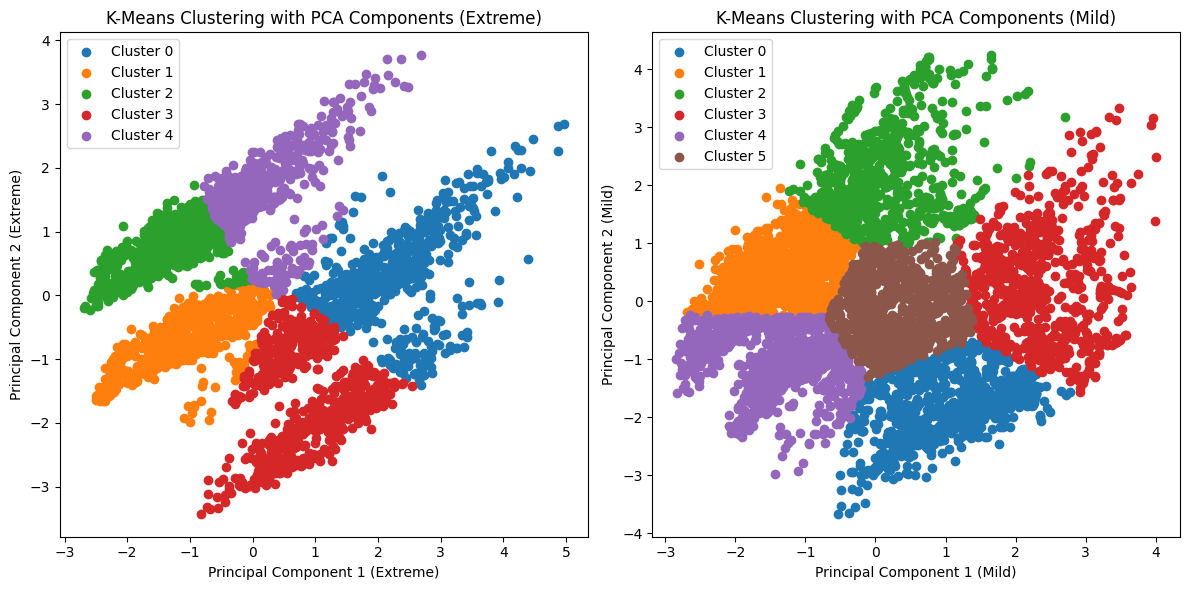

In [27]:
# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca_extreme = df_pca_result_extreme[['PC1_Extreme', 'PC2_Extreme']].values

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan untuk Extreme
kmeans_extreme = KMeans(n_clusters=5, n_init=10, random_state=42)

# Menentukan label cluster untuk setiap data hasil PCA untuk Extreme
cluster_labels_extreme = kmeans_extreme.fit_predict(X_pca_extreme)

# Menyatukan label klaster ke dalam dataset hasil PCA untuk Extreme
df_pca_result_extreme['Cluster'] = cluster_labels_extreme

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_pca_result_extreme_rounded = df_pca_result_extreme.round(4)

# Simpan hasil klastering Extreme ke file CSV
result_csv_path_extreme = 'D:/Tugas Akhir/Stroke/data_klastering_extreme.csv'
df_pca_result_extreme.to_csv(result_csv_path_extreme, index=False)

# Visualisasi hasil klastering untuk Extreme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Plot klaster untuk Extreme
for cluster in range(5):
    cluster_data_extreme = df_pca_result_extreme[df_pca_result_extreme["Cluster"] == cluster]
    plt.scatter(cluster_data_extreme[f"PC1_Extreme"], cluster_data_extreme[f"PC2_Extreme"], label=f'Cluster {cluster}')

# Tambahkan label dan judul untuk Extreme
plt.title('K-Means Clustering with PCA Components (Extreme)')
plt.xlabel('Principal Component 1 (Extreme)')
plt.ylabel('Principal Component 2 (Extreme)')
plt.legend()

# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca_mild = df_pca_result_mild[['PC1_Mild', 'PC2_Mild']].values


# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan untuk Mild
kmeans_mild = KMeans(n_clusters=6, n_init=20, random_state=42)

# Menentukan label cluster untuk setiap data hasil PCA untuk Mild
cluster_labels_mild = kmeans_mild.fit_predict(X_pca_mild)

# Menyatukan label klaster ke dalam dataset hasil PCA untuk Mild
df_pca_result_mild['Cluster'] = cluster_labels_mild

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_pca_result_mild_rounded = df_pca_result_mild.round(4)

# Simpan hasil klastering Mild ke file CSV
result_csv_path_mild_rounded = 'D:/Tugas Akhir/Stroke/data_klastering_mild.csv'
df_pca_result_mild_rounded.to_csv(result_csv_path_mild_rounded, index=False)

# Visualisasi hasil klastering untuk Mild
plt.subplot(1, 2, 2)

# Plot klaster untuk Mild
for cluster in range(6):
    cluster_data_mild = df_pca_result_mild[df_pca_result_mild["Cluster"] == cluster]
    plt.scatter(cluster_data_mild[f"PC1_Mild"], cluster_data_mild[f"PC2_Mild"], label=f'Cluster {cluster}')

# Tambahkan label dan judul untuk Mild
plt.title('K-Means Clustering with PCA Components (Mild)')
plt.xlabel('Principal Component 1 (Mild)')
plt.ylabel('Principal Component 2 (Mild)')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
df_pca_result_extreme_rounded

,PC1_Extreme,PC2_Extreme,PC3_Extreme,PC4_Extreme,PC5_Extreme,PC6_Extreme,PC7_Extreme,PC8_Extreme,PC9_Extreme,PC10_Extreme,PC11_Extreme,PC12_Extreme,PC13_Extreme,stroke,Cluster
0,1.0185,1.0364,2.3949,-0.1011,-0.2886,0.8515,-2.8277,1.2666,0.0990,0.0287,-1.5761,1.9581,0.4577,1,4
1,1.4028,1.1377,2.9496,0.1808,-0.6517,1.0263,-2.9939,1.3144,0.1021,0.7162,1.4126,2.2777,-0.5919,1,0
2,-1.3043,0.8707,-0.9883,-1.5251,0.2977,1.2187,-0.9958,0.4960,-0.5727,-1.0519,0.5015,-0.2943,-0.4589,1,2
3,3.3687,-0.8044,1.9198,-0.5226,-1.5658,0.3300,0.6042,-0.7537,0.6365,1.0837,1.5494,-1.7401,-0.2371,1,0
4,0.4225,1.8471,0.0331,-0.6516,1.0931,-1.6425,-1.4889,0.1340,-0.7915,-0.7050,0.5007,-0.3834,1.1387,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.9384,-0.9366,1.1720,-0.9203,-0.2427,-0.6762,-1.1255,-0.2622,-1.1216,0.3627,0.0666,-0.2593,0.2451,0,1
3507,2.3462,-1.1992,0.9355,-0.6942,-0.9700,-0.0445,1.5557,-0.8760,0.4070,-0.3498,-0.9659,0.4643,1.2046,0,0
3508,0.7374,-2.0906,0.1661,-0.9440,-0.9483,-0.8029,0.8923,0.6269,-0.9601,-0.6077,-0.4074,0.4241,-1.1509,0,3
3509,0.0516,1.9314,0.2756,-0.0495,1.3932,-1.1215,-0.5669,0.6614,-0.5318,-0.6630,-0.2755,-1.5012,-0.4473,0,4


In [29]:
df_pca_result_mild_rounded

,PC1_Mild,PC2_Mild,PC3_Mild,PC4_Mild,PC5_Mild,PC6_Mild,PC7_Mild,PC8_Mild,PC9_Mild,PC10_Mild,PC11_Mild,PC12_Mild,PC13_Mild,stroke,Cluster
0,0.6926,4.0708,0.3417,0.7812,1.0250,0.6278,-0.8607,0.9356,-0.2131,-1.4320,1.5473,0.5602,0.7762,1,2
1,0.4421,1.6706,1.8276,0.2550,-0.5347,0.8670,-2.0532,-0.6343,1.1984,-1.5214,1.1508,1.6021,-0.8357,1,2
2,-1.3311,0.8545,0.0392,1.7320,-0.8391,-0.4613,0.8264,-0.2044,-1.5955,0.5407,0.3727,-0.8274,0.1769,1,1
3,3.3196,-0.7450,1.3980,-0.6132,-1.0033,0.0041,0.2591,-0.6595,0.6592,1.7617,-0.1222,-0.3803,0.6730,1,3
4,0.4167,2.5185,-0.2267,-0.7751,0.8693,-0.1486,-0.5903,0.8871,-0.7679,-0.3027,-0.7917,-1.2277,-0.2772,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,-0.6712,0.7452,-0.2484,-1.3044,-0.2256,2.0571,-0.2588,-1.0283,0.0932,1.4101,0.9403,-1.4748,-0.0339,1,1
5767,-1.0920,0.5871,-0.9453,-1.7240,-0.8046,1.7979,-0.8156,-0.7408,1.0261,0.3382,-0.7461,-0.1986,-0.6412,1,1
5768,-1.0018,-0.2050,-0.9286,-1.7955,-1.0573,1.8794,-0.9614,0.6046,-1.1045,1.1336,0.1106,-0.0875,-0.5738,1,1
5769,-1.0152,0.0248,-0.6967,-1.8820,-0.7302,1.6022,-0.7976,-0.8075,0.1756,1.4050,0.6051,-0.4647,-0.5880,1,1


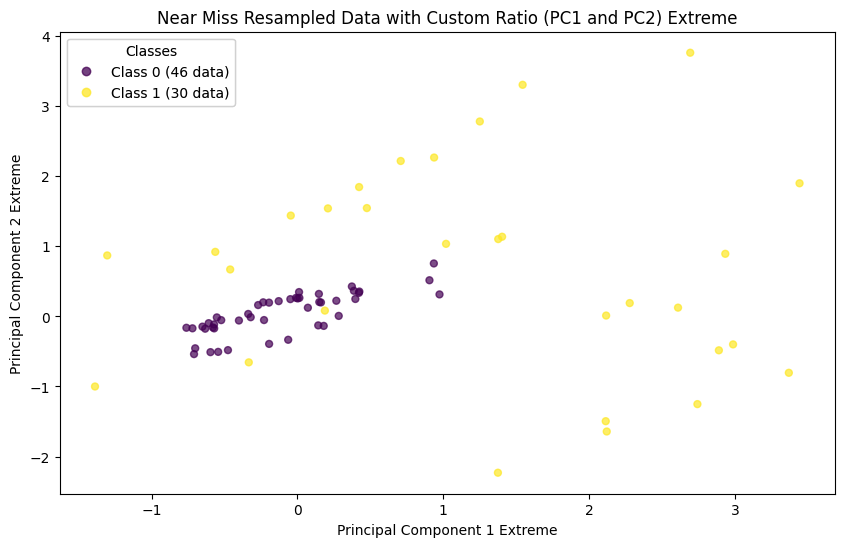

In [30]:
from imblearn.under_sampling import NearMiss

# Bagian 3: Near Miss
# Pilih fitur hasil PCA (sesuaikan dengan jumlah komponen utama yang digunakan)
X_pca = df_pca_result_extreme.drop(['stroke', 'Cluster'], axis=1).values  # Hapus kolom 'Cluster'
y = df_pca_result_extreme['stroke'].values
cluster_labels = df_pca_result_extreme['Cluster'].values  # Simpan label kluster sebelum dihapus

# Inisialisasi model Near Miss dengan rasio kustom (misalnya, 0.2 untuk mendapatkan rasio 80:20)
nm_custom_ratio = NearMiss(sampling_strategy=0.65, n_neighbors=3, version=2)

# Resample data menggunakan Near Miss dengan rasio kustom
X_resampled_custom, y_resampled_custom = nm_custom_ratio.fit_resample(X_pca, y)

# Buat DataFrame baru dari data yang sudah di-resample dengan rasio kustom
df_resampled_custom = pd.DataFrame(data=X_resampled_custom, columns=[f"PC{i+1}" for i in range(X_resampled_custom.shape[1])])
df_resampled_custom['stroke'] = y_resampled_custom

# Tambahkan kembali kolom 'Cluster'
df_resampled_custom['Cluster'] = cluster_labels[:len(df_resampled_custom)]

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_resampled_custom_rounded = df_resampled_custom.round(4)


# Menyimpan hasil Near Miss Resampling dengan rasio kustom ke file CSV
result_csv_path_resampled_custom = 'D:/Tugas Akhir/Stroke/data_hasil_nearmiss_extreme.csv'
df_resampled_custom_rounded.to_csv(result_csv_path_resampled_custom, index=False)

# Hitung jumlah data untuk masing-masing kelas setelah resampling dengan rasio kustom
count_class_0_custom = df_resampled_custom_rounded[df_resampled_custom['stroke'] == 0].shape[0]
count_class_1_custom = df_resampled_custom_rounded[df_resampled_custom['stroke'] == 1].shape[0]

# Visualisasi data setelah resampling dengan rasio kustom
plt.figure(figsize=(10, 6))
scatter_resampled_custom = plt.scatter(df_resampled_custom_rounded['PC1'], df_resampled_custom_rounded['PC2'], c=df_resampled_custom['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

# Tambahkan legenda untuk kelas
legend_resampled_custom = plt.legend(*scatter_resampled_custom.legend_elements(), title="Classes")
# Tambahkan keterangan jumlah data pada legend
legend_resampled_custom.texts[0].set_text(f'Class 0 ({count_class_0_custom} data)')
legend_resampled_custom.texts[1].set_text(f'Class 1 ({count_class_1_custom} data)')

plt.gca().add_artist(legend_resampled_custom)

# Tambahkan label dan judul
plt.title('Near Miss Resampled Data with Custom Ratio (PC1 and PC2) Extreme')
plt.xlabel('Principal Component 1 Extreme')
plt.ylabel('Principal Component 2 Extreme')
plt.show()


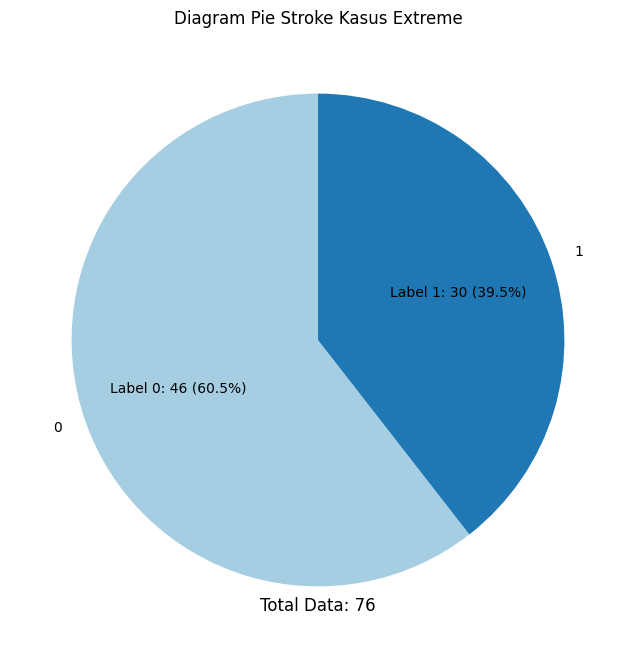

In [31]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_resampled_custom['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data
total_data = len(df_resampled_custom['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({stroke_counts[0]/total_data*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({stroke_counts[1]/total_data*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Kasus Extreme')

# Tampilkan diagram
plt.show()


In [32]:
df_resampled_custom_rounded

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke,Cluster
0,0.1609,0.1999,2.3917,0.2535,0.0122,0.6571,-0.6305,0.5287,-0.5862,-0.6197,2.5260,-0.2013,-0.2629,0,4
1,-0.0488,0.2470,2.0321,0.0947,0.4436,0.7060,-0.2735,0.5475,-0.5498,-1.2199,-0.7226,-0.9224,0.7496,0,0
2,-0.0099,0.2653,1.8600,0.2272,0.2349,0.6066,-0.0701,-0.6743,0.9865,-1.2400,-0.6305,-0.5299,0.9584,0,2
3,0.1496,0.2060,2.3837,0.2830,0.0595,0.6811,-0.4812,0.5090,-0.6250,-0.7117,2.5498,0.1305,-0.1086,0,0
4,-0.1951,0.1971,1.8450,0.2818,0.1884,0.5932,-0.2110,-0.5062,1.1279,-1.0772,-0.7780,-1.3659,0.1602,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2.1203,-1.6424,0.4181,-1.4210,-1.5783,-0.9552,-0.2926,-1.0903,0.4883,0.0628,-0.2087,-0.4636,0.7763,1,4
72,1.2501,2.7833,1.7999,2.7019,-1.7436,2.0729,0.0344,0.0129,0.6651,2.6112,-0.3810,1.2601,-1.5828,1,2
73,2.8890,-0.4835,1.3799,1.4661,1.0232,1.9468,-2.9979,1.5939,0.3225,0.6867,-2.3324,0.0237,-0.4619,1,2
74,-0.0460,1.4400,0.2555,-1.1558,0.6553,2.3986,1.1666,0.0341,-1.1368,0.7663,-1.1691,-1.0090,0.7007,1,0
